In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from adjustText import adjust_text
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [88]:
pop_df=pd.read_csv(r'C:\Users\Yasaman\Downloads\World_bank_population.csv',skiprows=3)
pop_df=pop_df[['Country Code','2003','2019']].dropna()
pop_df['2019']=pop_df['2019'].astype(int)
possible_countries=pop_df.query(" `2019` >=1000000")['Country Code'].values
possible_countries=[x.lower() for x in possible_countries]

In [89]:

df=pd.read_csv(r"C:\Users\Yasaman\Downloads\Attention-fractional counting.csv")
df=df.rename(columns={'year':'Year', 'aggregated_value':'count', 'country':'Mention_country', 'affiliation_country':'Aff_country'})
Country_list={'Egypt':'EGY', 'Tunisia':'TUN','Libya':'LBY','Syria':'SYR','Yemen':'YEM','Bahrain':'BHR','Jordan':'JOR','Kuwait':'KWT','Morocco':'MAR','Oman':'OMN'}
rev_Country_list={Country_list[key]: key for key in Country_list}
abbr=[country.lower() for country in Country_list.values()]
country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
physical_sciences=[ 'MATH', 'ENGI', 'PHYS', 'COMP', "MUL"]
df=df[~df['subjarea'].isin(physical_sciences)]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['irn']='Iran'
map['usa']='USA'
map['gbr']='UK'
filtered_df=df[(df['Mention_country'].isin(abbr))&(df['Mention_country']!=df['Aff_country'])]

before_df=filtered_df[filtered_df['Year'].isin(np.arange(2002, 2011, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_before'})
after_df=filtered_df[filtered_df['Year'].isin(np.arange(2011, 2020, 1))].groupby(by=['Mention_country','Aff_country']).sum().reset_index()[['count','Mention_country','Aff_country']].rename(columns={'count':'count_after'})
compare_df=before_df.merge(after_df, how='outer', on=['Mention_country','Aff_country']).fillna(0)
compare_df['count_after']/=9
compare_df['count_before']/=9
compare_df=compare_df.groupby(['Aff_country'])[['count_before', 'count_after']].sum().reset_index()
compare_df['difference']=compare_df['count_after']-compare_df['count_before']
compare_df=compare_df.sort_values('difference', ascending=False)




country_df=pd.read_csv(r"C:\Users\Yasaman\Downloads\arabspring_number_of_papers_per_year_per_descipline_per_country.csv")
country_df=country_df.groupby(['affiliation_country'])['aggregated_value'].sum().reset_index()
country_df=country_df.merge(compare_df, left_on='affiliation_country', right_on='Aff_country', how='left').dropna(subset=['Aff_country'])
country_df=country_df[country_df['affiliation_country'].isin(possible_countries)]



country_codes=pd.read_csv(r"C:\Users\Yasaman\Downloads\iso3.csv")
country_codes['iso3']=[c.lower() for c in country_codes['iso3']]
map={country_codes.iloc[c]['iso3']: country_codes.iloc[c]['name'] for c in range(len(country_codes))}
map['irn']='Iran'
map['usa']='USA'
map['gbr']='UK'
map['rus']='Russia'
map['syr']='Syria'
map['are']='UAE'
plot_a_df=country_df.reset_index(drop=True)


aus
chn
deu
esp
fra
gbr
ind
irn
ita
jpn
mys
sau
usa
Pearson Correlation Coefficient: 0.6859057984232347
P-value: 1.3374189169282954e-22
Spearman Correlation Coefficient: 0.8402121614195917
P-value: 5.639574424669027e-42


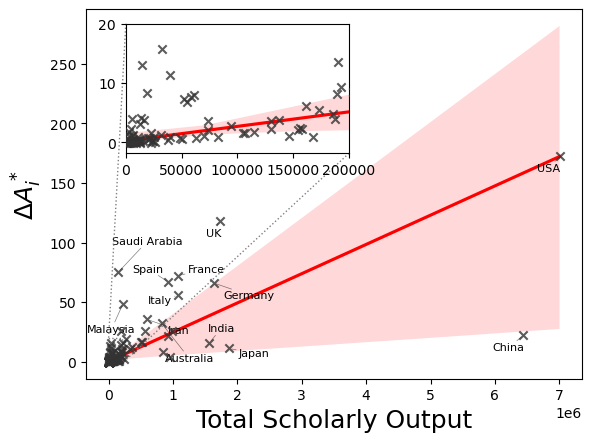

In [90]:
fig, ax1=plt.subplots(nrows=1, ncols=1)
ins = ax1.inset_axes([0.08,0.61,0.45,0.35])


sns.regplot(plot_a_df, x='aggregated_value', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ax1,  scatter_kws={"zorder":10}, robust=True)
ax1.set_ylabel(r'$\Delta A_i^*$', fontsize=18)
ax1.set_xlabel('Total Scholarly Output', fontsize=18)


sns.regplot(plot_a_df, x='aggregated_value', y='difference' ,marker="x", color=".2", line_kws=dict(color="r"),ax=ins,  scatter_kws={"zorder":10}, robust=True)
ins.set_ylabel(r'', fontsize=10)
ins.set_xlabel(r'', fontsize=10)
ins.set_xlim(0, 2e5)
ins.set_ylim(-15/8, 20)


points=[]
# Annotate each point
for line in plot_a_df[(plot_a_df['difference']>30)|(plot_a_df['aggregated_value']>1e6)].index:

    x = plot_a_df.aggregated_value[line]
    y = plot_a_df.difference[line]
    label =map[plot_a_df.affiliation_country[line]]
    print(plot_a_df.affiliation_country[line])
    points+=[ax1.text(x, y, label,
                    fontsize=8, ha='center', va='center')]

adjust_text(points, arrowprops=dict(arrowstyle="-", color='k', lw=0.5, alpha=.5), expand=(1.5, 2.5))        




correlation_coefficient, p_value = pearsonr(plot_a_df['difference'], plot_a_df['aggregated_value'])
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

correlation_coefficient, p_value = stats.spearmanr(plot_a_df['difference'], plot_a_df['aggregated_value'])
print("Spearman Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

mark_inset(ax1, ins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle=':')

fig.savefig('attention_vs_scholarlyoutput.pdf', bbox_inches='tight')